In [46]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [47]:
# cd ../fput

In [48]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import pickle
import matplotlib.pyplot as plt
from numpy import linalg as LA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from fput.integrator import FPUT_Integrator
from numpy import linalg as LA
from fput.utils import (
    plot_mode_energies,
    create_input_data_vector,
    compute_explained_ratio,
    plot_consecutive_distances
)

# System inputs

In [49]:
NUM_ATOMS = 32  # number of particles equals to N in FPUT equations
T_MAX = 20000   # maximum time of simulation
INTEGRATION_TIME_STEP = 0.05
INITIAL_MODE_NUMBER = 1
NUM_MODES = 3  # number of modes to be observed
INITIAL_MODE_AMPLITUDE = 10

# Compute PCs vs initial energies

Here we compute the principal components, varyin the initial energy. Varying the initial energy from low to high, we expect phase transition between non-ergotic to ergotic. Therefore we ideally observe the PCs to have higher value to low component for low initial energy (ergotic) and more distributed values for high high energy (ergocit)

In [4]:
import pickle
    
beta_range = np.arange(0.1, 3.0, 0.1, dtype=float)

data_dict = dict()

for beta in beta_range:
    print("processing beta:", beta)
    fpu = FPUT_Integrator(
        num_atoms=NUM_ATOMS,
        num_modes=NUM_MODES,
        initial_mode_number=INITIAL_MODE_NUMBER,
        initial_mode_amplitude=INITIAL_MODE_AMPLITUDE,
        t_step=INTEGRATION_TIME_STEP,
        t_max=3*T_MAX,
        alpha=0.0,
        beta=beta
    )

    data = fpu.run(method="verlet")    
    data_dict[beta] = data

with open(f'../notebooks/output/benettin_data_dict.pickle', 'wb') as handle:
    pickle.dump(data_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)

processing beta: 0.1


100%|██████████| 1199999/1199999 [05:06<00:00, 3918.20it/s]


processing beta: 0.2


100%|██████████| 1199999/1199999 [05:07<00:00, 3900.28it/s]


processing beta: 0.30000000000000004


100%|██████████| 1199999/1199999 [05:07<00:00, 3907.19it/s]


processing beta: 0.4


100%|██████████| 1199999/1199999 [05:07<00:00, 3903.02it/s]


processing beta: 0.5


100%|██████████| 1199999/1199999 [05:05<00:00, 3931.07it/s]


processing beta: 0.6


100%|██████████| 1199999/1199999 [05:12<00:00, 3836.40it/s]


processing beta: 0.7000000000000001


100%|██████████| 1199999/1199999 [05:14<00:00, 3813.21it/s]


processing beta: 0.8


100%|██████████| 1199999/1199999 [05:30<00:00, 3631.55it/s]


processing beta: 0.9


100%|██████████| 1199999/1199999 [05:10<00:00, 3864.01it/s]


processing beta: 1.0


100%|██████████| 1199999/1199999 [05:12<00:00, 3839.64it/s]


processing beta: 1.1


100%|██████████| 1199999/1199999 [05:11<00:00, 3853.21it/s]


processing beta: 1.2000000000000002


100%|██████████| 1199999/1199999 [05:06<00:00, 3912.25it/s]


processing beta: 1.3000000000000003


100%|██████████| 1199999/1199999 [05:05<00:00, 3927.65it/s]


processing beta: 1.4000000000000001


100%|██████████| 1199999/1199999 [05:10<00:00, 3861.37it/s]


processing beta: 1.5000000000000002


100%|██████████| 1199999/1199999 [05:11<00:00, 3855.30it/s]


processing beta: 1.6


100%|██████████| 1199999/1199999 [05:25<00:00, 3690.90it/s]


processing beta: 1.7000000000000002


100%|██████████| 1199999/1199999 [05:20<00:00, 3743.55it/s]


processing beta: 1.8000000000000003


100%|██████████| 1199999/1199999 [05:28<00:00, 3647.53it/s]


processing beta: 1.9000000000000001


100%|██████████| 1199999/1199999 [05:25<00:00, 3690.94it/s]


processing beta: 2.0


100%|██████████| 1199999/1199999 [05:16<00:00, 3789.18it/s]


processing beta: 2.1


100%|██████████| 1199999/1199999 [05:19<00:00, 3759.78it/s]


processing beta: 2.2


100%|██████████| 1199999/1199999 [05:42<00:00, 3499.73it/s]


processing beta: 2.3000000000000003


100%|██████████| 1199999/1199999 [05:18<00:00, 3762.08it/s]


processing beta: 2.4000000000000004


100%|██████████| 1199999/1199999 [05:17<00:00, 3783.41it/s]


processing beta: 2.5000000000000004


100%|██████████| 1199999/1199999 [05:15<00:00, 3801.03it/s]


processing beta: 2.6


100%|██████████| 1199999/1199999 [05:11<00:00, 3855.89it/s]


processing beta: 2.7


100%|██████████| 1199999/1199999 [05:13<00:00, 3830.45it/s]


processing beta: 2.8000000000000003


100%|██████████| 1199999/1199999 [05:06<00:00, 3918.52it/s]


processing beta: 2.9000000000000004


100%|██████████| 1199999/1199999 [05:05<00:00, 3924.30it/s]


In [6]:
# import sys
# print(f"Size of data_dict: {sys.getsizeof(data_dict)/(1024*1024)} MB");

In [3]:
with open('output/benettin_data_dict.pickle', 'rb') as handle:
    data_dict = pickle.load(handle)
    
beta_range = np.arange(0.1, 3.0, 0.1, dtype=float)

In [5]:
explained_variance_ratio_cumsum_vs_energy = list()

for _, data in tqdm(data_dict.items()):
    X = create_input_data_vector(data, sample_manifold=False)
    explained_variance_ratio = compute_explained_ratio(
        X, pre_whitening=True, verbose=False)

    explained_variance_ratio_cumsum_vs_energy.append(explained_variance_ratio.cumsum())

explained_variance_ratio_cumsum_vs_energy = np.array(explained_variance_ratio_cumsum_vs_energy)

  0%|          | 0/29 [00:00<?, ?it/s]

NameError: name 'explained_variance_ratio_cumsum_vs_energy' is not defined

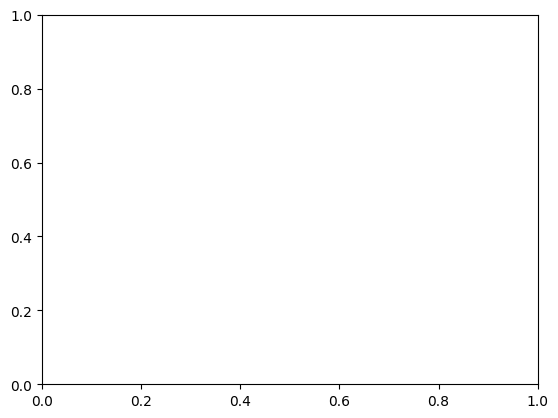

In [ ]:
fig, ax = plt.subplots(1, 1)

lim = 100
for x, beta in zip(explained_variance_ratio_cumsum_vs_energy[:lim], beta_range[:lim]):
    ax.plot(x, ".-", label=f"beta={np.round(beta, 2)}")
    

ax.plot(explained_variance_ratio_cumsum_vs_energy[16], "--", label=f"beta={np.round(beta_range[16], 2)}", color='k')

# relabel xaxis
# ax.set_xticks(np.arange(1, 30,10))
    
ax.legend()
ax.set_xlim(0, 10)
ax.grid()
ax.set_ylabel('cumsum expl.variance ratio')

In [18]:
explained_variance_ratio_cumsum_vs_energy[0].shape

(4,)